# Brain Stroke Prediction

In [1]:
from IPython.display import Image
Image(url='https://roboticsbiz.com/wp-content/uploads/2020/11/brain.jpg', width=200)

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Import the Dataset
data=pd.read_csv(r"C:\Users\JJ\Downloads\stroke.csv")

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Step 1 : Understanding the Data

In [5]:
data.shape

(4981, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [642]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


C:\Users\JJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

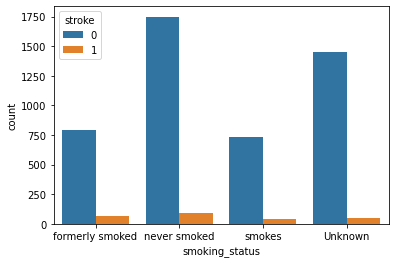

In [643]:
sns.countplot(data["smoking_status"],hue=data["stroke"])

In [644]:
data.groupby(data['gender'])['stroke'].sum()

gender
Female    140
Male      108
Name: stroke, dtype: int64

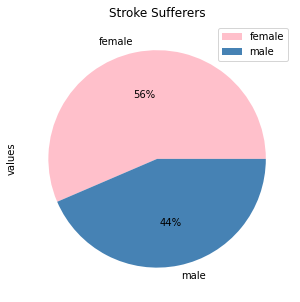

In [645]:
df = pd.DataFrame({'values': [140,108]},index=["female","male"])
colors = ['pink','steelblue']
plot = df.plot.pie(y='values', figsize=(5, 5),autopct='%1.0f%%',colors=colors,title="Stroke Sufferers")

In [646]:
data.groupby(data['work_type'])['stroke'].sum()

work_type
Govt_job          33
Private          148
Self-employed     65
children           2
Name: stroke, dtype: int64

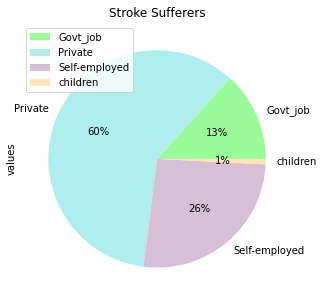

In [647]:
df1 = pd.DataFrame({'values': [33,148,65,2]},index=["Govt_job","Private","Self-employed","children"])
colors = ['palegreen','paleturquoise','thistle','moccasin']
plot = df1.plot.pie(y='values',autopct='%1.0f%%',colors=colors,title="Stroke Sufferers",figsize=(5,5))

In [648]:
data.groupby(data["smoking_status"])["stroke"].sum()

smoking_status
Unknown            47
formerly smoked    70
never smoked       89
smokes             42
Name: stroke, dtype: int64

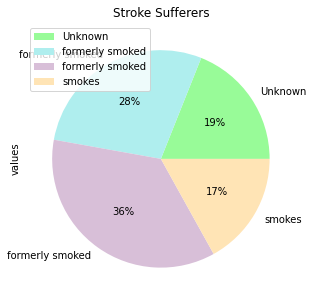

In [651]:
df2 = pd.DataFrame({'values': [47,70,89,42]},index=["Unknown","formerly smoked","formerly smoked","smokes"])
colors = ['palegreen','paleturquoise','thistle','moccasin']
plot = df2.plot.pie(y='values',autopct='%1.0f%%',colors=colors,title="Stroke Sufferers",figsize=(5,5))

C:\Users\JJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

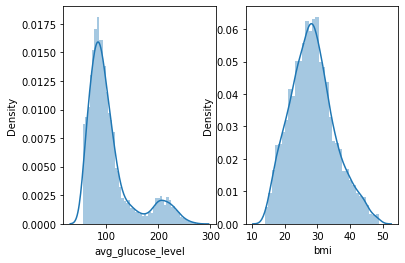

In [652]:
plt.subplot(1,2,1)
sns.distplot(data["avg_glucose_level"])
plt.subplot(1,2,2)
sns.distplot(data["bmi"])

# Step 2 : Data Preprocessing-----Handling missing values,outliers,categorical data,feature scaling

In [653]:
#Checking the DataSet whether it has any null values or not

In [654]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [655]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [656]:
data['smoking_status'].replace(["smokes","formerly smoked","never smoked" ,"Unknown"],[0, 1, 2, 3], inplace=True)

In [657]:
data["smoking_status"].unique()

array([1, 2, 0, 3], dtype=int64)

In [658]:
data["smoking_status"].value_counts()

2    1838
3    1500
1     867
0     776
Name: smoking_status, dtype: int64

In [659]:
#Standardizing the columns
numeric_features = ["age", "bmi","avg_glucose_level"]
numeric_transformer = StandardScaler()

In [660]:
#Handling Categorical data
categorical_features = ["work_type", "gender", "Residence_type","ever_married"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [661]:
transformer= ColumnTransformer(transformers=[("trf1", numeric_transformer, numeric_features),
                                             ("trf2", categorical_transformer, categorical_features)],remainder="passthrough")                               

# Model Building

In [662]:
#Splitting the data into training set and testing set in order to prevent dataleakage

In [663]:
from sklearn.model_selection import train_test_split

In [664]:
y=data['stroke']
x=data.drop('stroke',axis=1)

In [665]:
from sklearn.tree import DecisionTreeClassifier

In [666]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [667]:
X_train=pd.DataFrame(transformer.fit_transform(X_train))

In [668]:
X_test=transformer.transform(X_test)

In [669]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.116399,-0.650965,-0.296037,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.873104,0.476970,2.799168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,-0.187964,1.722092,0.241376,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.298359,-0.445886,-0.582863,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.447850,0.286539,3.568606,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


In [670]:
data['smoking_status'] = [ 0 if i =='smokes' or "formerly smokes" else 1 for i in data['smoking_status'] ]

# Model 1 : Gaussian Naive Bayes Classifier

In [671]:
from sklearn.naive_bayes import GaussianNB

In [672]:
gnb=GaussianNB()

In [673]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [674]:
Y_pred_gnb=gnb.predict(X_test)
Y_pred_gnb

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [675]:
accuracy_gnb=accuracy_score(Y_test,Y_pred_gnb)

In [676]:
accuracy_gnb

0.7592778335005015

In [677]:
print("Training Model Accuracy: ",np.mean(cross_val_score(gnb,X_train,Y_train,cv=10)))

Training Model Accuracy:  0.7504609513734083


In [678]:
print(confusion_matrix(Y_test,Y_pred_gnb))
print('The classification report is:\n{:}'.format(classification_report(Y_test,Y_pred_gnb)))

[[731 218]
 [ 22  26]]
The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       949
           1       0.11      0.54      0.18        48

    accuracy                           0.76       997
   macro avg       0.54      0.66      0.52       997
weighted avg       0.93      0.76      0.83       997



# Model 2: DecisionTree Classifier

In [679]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [680]:
Y_pred_gini= clf_gini.predict(X_test)

In [681]:
Y_pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [682]:
print(confusion_matrix(Y_test,Y_pred_gini))
print('The classification report is:\n{:}'.format(classification_report(Y_test,Y_pred_gini)))

[[946   3]
 [ 48   0]]
The classification report is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       0.00      0.00      0.00        48

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.91      0.95      0.93       997



In [683]:
accuracy_score(Y_test,Y_pred_gini)

0.9488465396188566

In [684]:
print("Training Model Accuracy:",np.mean(cross_val_score(clf_gini,X_train,Y_train,cv=10)))

Training Model Accuracy: 0.9455315424238988


# Model 3 : Random Forest Classifier

In [685]:
rfc = RandomForestClassifier(max_samples=0.60,random_state=42)
rfc.fit(X_train,Y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(max_samples=0.6, random_state=42)

In [686]:
Y_pred_rfc = rfc.predict(X_test)
Y_pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [687]:
print(confusion_matrix(Y_test,y_pred_rfc))
print('The classification report is:\n{:}'.format(classification_report(Y_test,Y_pred_rfc)))

[[941   8]
 [ 48   0]]
The classification report is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       949
           1       0.00      0.00      0.00        48

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.91      0.95      0.93       997



C:\Users\JJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [688]:
accuracy_score(Y_test,Y_pred_rfc)

0.9518555667001003

In [689]:
print("Training Model Accuracy: ",np.mean(cross_val_score(rfc,X_train,Y_train,cv=10)))

Training Model Accuracy:  0.9490459817886425
